# Project Title - Harnessing Data Science for Financial Security: EDA and Model Building in Money Laundering Detection

## MD Tahseen Equbal 

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\91771\Innomatics\Machine Learning\Machine Learning\ML Phase - 2\End To End Project\LI-Small_Trans.csv")

In [4]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:08,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0
1,2022/09/01 00:21,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0
2,2022/09/01 00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0
3,2022/09/01 00:16,3814,8006AD080,3814,8006AD080,12.32,US Dollar,12.32,US Dollar,Reinvestment,0
4,2022/09/01 00:00,20,8006AD530,20,8006AD530,2941.56,US Dollar,2941.56,US Dollar,Reinvestment,0


# Data Understanding 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 581.1+ MB


# Explotary Data Analysis

## Missing Value 

In [6]:
df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

## Duplicated

In [7]:
df.duplicated().sum()

8

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(6924041, 11)

## Type Correction

In [10]:
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [11]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df['From Bank']= df['From Bank'].astype('object')
df['To Bank']= df['To Bank'].astype("object")
df['Is Laundering']= df["Is Laundering"].astype('object')

In [12]:
df.dtypes

Timestamp             datetime64[ns]
From Bank                     object
Account                       object
To Bank                       object
Account.1                     object
Amount Received              float64
Receiving Currency            object
Amount Paid                  float64
Payment Currency              object
Payment Format                object
Is Laundering                 object
dtype: object

## Outlier

<AxesSubplot:>

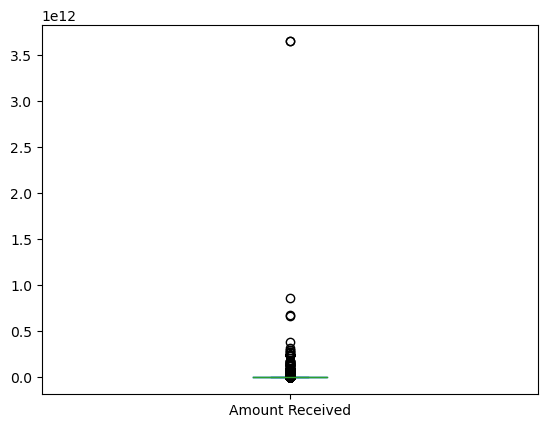

In [13]:
df['Amount Received'].plot(kind='box')

## Univariate Analysis

In [14]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [15]:
df['Date']=df["Timestamp"].dt.date

In [16]:
df['Time']=df["Timestamp"].dt.time

In [17]:
df.head(3)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Time
0,2022-09-01 00:08:00,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0,2022-09-01,00:08:00
1,2022-09-01 00:21:00,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0,2022-09-01,00:21:00
2,2022-09-01 00:00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0,2022-09-01,00:00:00


<AxesSubplot:xlabel='Date'>

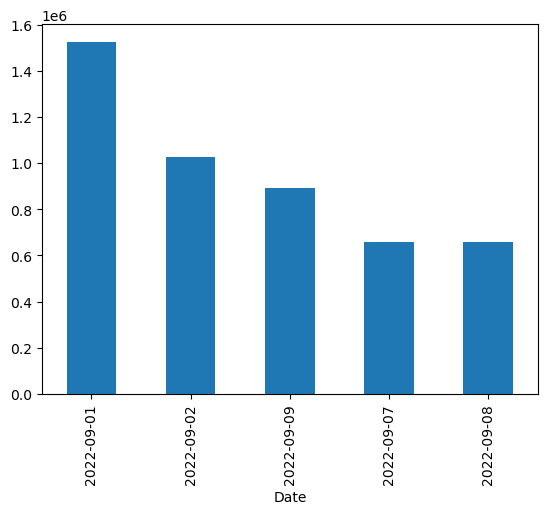

In [18]:
df['Date'].value_counts().head().plot(kind='bar')

<AxesSubplot:xlabel='Time'>

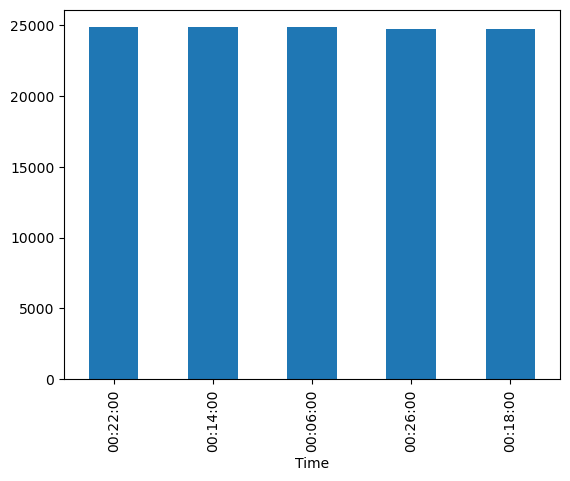

In [19]:
df['Time'].value_counts().head().plot(kind='bar')

In [20]:
# From Which Bank most of the transaction are Happened 
# From Which Account most of the transaction are Happened 
# To Which Bank most of the transaction are Happened 
# To Which Account most of the transaction are Happened 

In [21]:
df['Amount Received'].max()

3644853662746.95

In [22]:
df['Amount Received'].min()

1e-06

In [23]:
df['Amount Received'].mean()

6324073.911975413

In [24]:
df['Amount Paid'].mean()

4676041.375337785

In [25]:
df['Payment Currency'].unique()

array(['US Dollar', 'Euro', 'Bitcoin', 'Yuan', 'Yen', 'UK Pound',
       'Brazil Real', 'Australian Dollar', 'Rupee', 'Ruble',
       'Canadian Dollar', 'Mexican Peso', 'Swiss Franc', 'Shekel',
       'Saudi Riyal'], dtype=object)

In [26]:
df['Payment Format'].unique()

array(['Reinvestment', 'Cheque', 'ACH', 'Credit Card', 'Wire', 'Cash',
       'Bitcoin'], dtype=object)

In [27]:
df['Is Laundering'].value_counts()

Is Laundering
0    6920476
1       3565
Name: count, dtype: int64

In [28]:
df['Is Laundering'].value_counts()/df.shape[0]

Is Laundering
0    0.999485
1    0.000515
Name: count, dtype: float64

## Bi-Variate Analysis 

In [29]:
df[df['Is Laundering']==1]

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Time
38272,2022-09-01 00:02:00,70,10042B660,22661,805F7F2B0,7.083164e+04,US Dollar,7.083164e+04,US Dollar,Cash,1,2022-09-01,00:02:00
39028,2022-09-01 00:19:00,70,10042B660,212996,80609B4C0,3.370547e+04,US Dollar,3.370547e+04,US Dollar,Cash,1,2022-09-01,00:19:00
50683,2022-09-01 00:01:00,70,10042B660,11305,807861770,1.097976e+06,US Dollar,1.097976e+06,US Dollar,Cash,1,2022-09-01,00:01:00
127003,2022-09-01 00:00:00,11968,815630C40,249349,815635220,8.923300e+02,US Dollar,8.923300e+02,US Dollar,ACH,1,2022-09-01,00:00:00
136967,2022-09-01 00:25:00,70,10042B660,11968,816F93AF0,1.808140e+03,US Dollar,1.808140e+03,US Dollar,Cheque,1,2022-09-01,00:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6914370,2022-09-10 23:03:00,21939,812C4D330,41215,812C4D420,3.858790e+03,US Dollar,3.858790e+03,US Dollar,ACH,1,2022-09-10,23:03:00
6920167,2022-09-10 23:31:00,233465,814A02750,33219,814A02890,2.788770e+03,US Dollar,2.788770e+03,US Dollar,ACH,1,2022-09-10,23:31:00
6921098,2022-09-10 23:42:00,7839,807780F40,14652,8077814E0,1.168380e+03,Euro,1.168380e+03,Euro,ACH,1,2022-09-10,23:42:00
6921684,2022-09-10 23:31:00,216208,814C44D60,3460,814C44DB0,2.285860e+03,Euro,2.285860e+03,Euro,ACH,1,2022-09-10,23:31:00


In [30]:
df[df['Is Laundering']==1]['Date']

38272      2022-09-01
39028      2022-09-01
50683      2022-09-01
127003     2022-09-01
136967     2022-09-01
              ...    
6914370    2022-09-10
6920167    2022-09-10
6921098    2022-09-10
6921684    2022-09-10
6923934    2022-09-10
Name: Date, Length: 3565, dtype: object

In [31]:
df[df['Is Laundering']==1]['Date'].value_counts()

Date
2022-09-08    402
2022-09-06    380
2022-09-05    370
2022-09-07    368
2022-09-09    367
2022-09-02    350
2022-09-01    310
2022-09-10    301
2022-09-03    292
2022-09-04    291
2022-09-11     47
2022-09-13     29
2022-09-12     27
2022-09-14     18
2022-09-15      6
2022-09-16      5
2022-09-17      2
Name: count, dtype: int64

<AxesSubplot:xlabel='Date'>

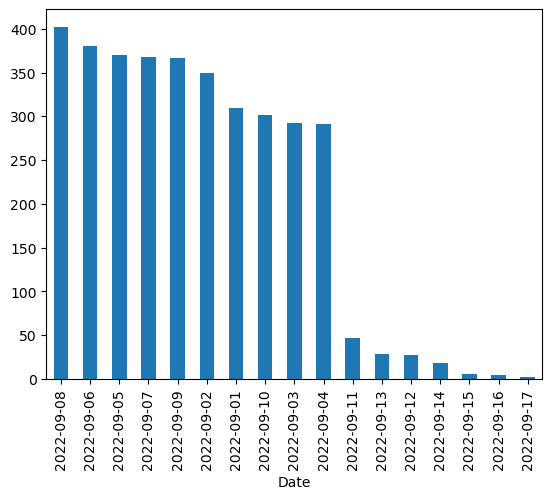

In [32]:
df[df['Is Laundering']==1]['Date'].value_counts().plot(kind='bar')

In [33]:
df[df['Is Laundering']==1]['Time'].value_counts()

Time
00:03:00    12
12:58:00    10
16:00:00     9
19:25:00     8
12:27:00     8
            ..
17:06:00     1
09:39:00     1
22:35:00     1
22:28:00     1
22:34:00     1
Name: count, Length: 1299, dtype: int64

<AxesSubplot:xlabel='Time'>

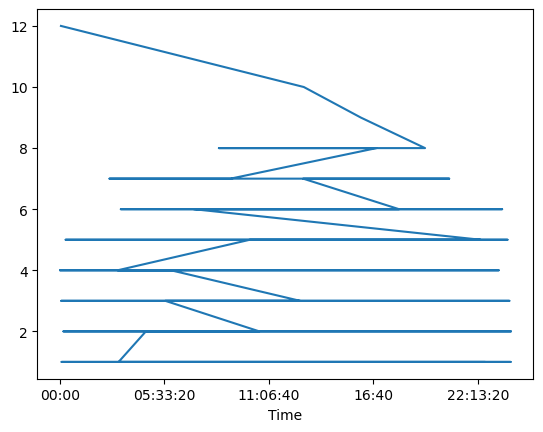

In [34]:
df[df['Is Laundering']==1]['Time'].value_counts().plot(kind='line')

In [35]:
df[df['Is Laundering']==1]['From Bank'].value_counts().head()

From Bank
70      850
11       83
20       78
12       64
1217     47
Name: count, dtype: int64

<AxesSubplot:xlabel='From Bank'>

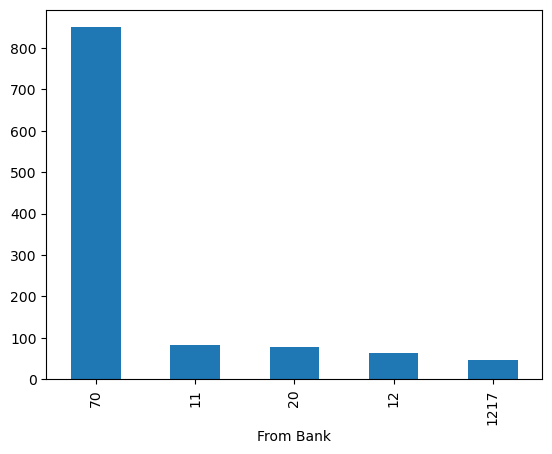

In [36]:
df[df['Is Laundering']==1]['From Bank'].value_counts().head().plot(kind='bar')

In [37]:
df[df['Payment Currency']=='US Dollar']

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Time
0,2022-09-01 00:08:00,11,8000ECA90,11,8000ECA90,3.195403e+06,US Dollar,3195403.00,US Dollar,Reinvestment,0,2022-09-01,00:08:00
1,2022-09-01 00:21:00,3402,80021DAD0,3402,80021DAD0,1.858960e+03,US Dollar,1858.96,US Dollar,Reinvestment,0,2022-09-01,00:21:00
2,2022-09-01 00:00:00,11,8000ECA90,1120,8006AA910,5.925710e+05,US Dollar,592571.00,US Dollar,Cheque,0,2022-09-01,00:00:00
3,2022-09-01 00:16:00,3814,8006AD080,3814,8006AD080,1.232000e+01,US Dollar,12.32,US Dollar,Reinvestment,0,2022-09-01,00:16:00
4,2022-09-01 00:00:00,20,8006AD530,20,8006AD530,2.941560e+03,US Dollar,2941.56,US Dollar,Reinvestment,0,2022-09-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923820,2022-09-10 23:38:00,3389,807ECF700,3389,807ECF700,5.245935e+04,Saudi Riyal,13985.06,US Dollar,ACH,0,2022-09-10,23:38:00
6923886,2022-09-10 23:38:00,236488,814B886B1,236488,814B886B0,3.300000e-05,Bitcoin,0.39,US Dollar,ACH,0,2022-09-10,23:38:00
6924019,2022-09-10 23:38:00,13474,803A93631,13474,803A93630,7.000000e-06,Bitcoin,0.08,US Dollar,ACH,0,2022-09-10,23:38:00
6924021,2022-09-10 23:31:00,13474,803A93631,13474,803A93630,2.000000e-05,Bitcoin,0.23,US Dollar,ACH,0,2022-09-10,23:31:00


In [38]:
df[(df['Is Laundering'] == 1) & (df['Payment Currency'] == "US Dollar")]['Amount Paid'].sum()


2358387413.91

In [39]:
df[df['Is Laundering'] == 1]['Payment Format'].value_counts()


Payment Format
ACH            2611
Cheque          459
Credit Card     261
Cash            124
Bitcoin         110
Name: count, dtype: int64

<AxesSubplot:xlabel='Payment Format'>

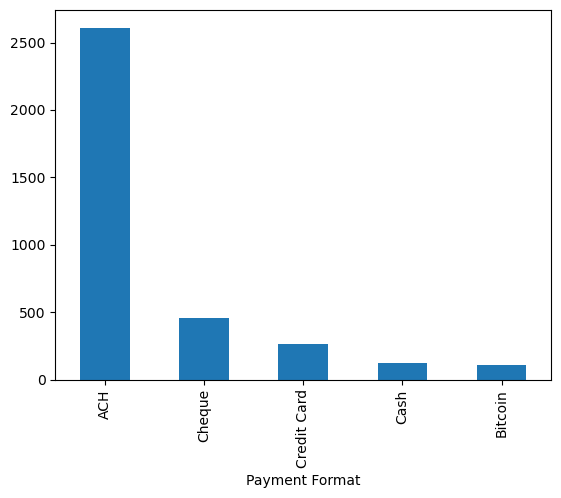

In [40]:
df[df['Is Laundering'] == 1]['Payment Format'].value_counts().plot(kind="bar")


## Relationship

In [41]:
df['Week']=df['Timestamp'].dt.day_name()

In [42]:
df.drop(["Timestamp",'Date'],axis =1,inplace = True)

In [43]:
df.head(2)

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Time,Week
0,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0,00:08:00,Thursday
1,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0,00:21:00,Thursday


In [44]:
df.drop('Time',axis = 1,inplace = True)

In [45]:
contingency = pd.crosstab(df['Is Laundering'], df['Week'])


In [46]:
import scipy.stats as st
x,p,y,z = st.chi2_contingency(contingency)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relation ship")

There is a relationship


In [47]:
contingency = pd.crosstab(df['Payment Format'],df['Is Laundering'])
x,p,y,z = st.chi2_contingency(contingency)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relation ship")

There is a relationship


In [48]:
contingency = pd.crosstab(df['Payment Currency'],df['Is Laundering'])
x,p,y,z = st.chi2_contingency(contingency)

if p < 0.05:
    print("There is a relationship")
else:
    print("There is no relation ship")

There is a relationship


# Model Building

In [49]:
X = df.drop(['Is Laundering'],axis = 1)
y = df['Is Laundering']

In [50]:
cat = ['From Bank','Account','To Bank','Receiving Currency','Payment Currency','Payment Format','Week']

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [54]:
ohe = Pipeline([('Encoder',OneHotEncoder(drop = 'first',handle_unknown='ignore'))])

In [55]:
transformer = ColumnTransformer([('One Hot Encoding',ohe,cat)])

In [56]:
model = Pipeline([("Transformer",transformer),
                 ("Estimator",XGBClassifier())])

In [57]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\91771\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test.astype('int'),y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2076113
           1       1.00      0.03      0.05      1100

    accuracy                           1.00   2077213
   macro avg       1.00      0.51      0.53   2077213
weighted avg       1.00      1.00      1.00   2077213



In [60]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from imblearn.under_sampling import RandomUnderSampler

In [62]:
rus = RandomUnderSampler()
X_s,y_s = rus.fit_resample(X,y.astype('int'))

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=0.3,random_state=42)
ohe = Pipeline([('Encoder',OneHotEncoder(drop = 'first',handle_unknown='ignore'))])
transformer = ColumnTransformer([('One Hot Encoding',ohe,cat)])
model = Pipeline([("Transformer",transformer),
                 ("Estimator",XGBClassifier())])
model.fit(X_train,y_train)
y_pred = model.predict(X_test).astype('object')
y_pred = model.predict(X_test)
print(classification_report(y_test.astype('int'),y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1085
           1       0.80      0.96      0.87      1054

    accuracy                           0.86      2139
   macro avg       0.88      0.87      0.86      2139
weighted avg       0.88      0.86      0.86      2139



C:\Users\91771\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\91771\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Saving Pickel File

In [66]:
import pickle
import os

# Function to save the model and display the location
def save_model(model, filename):
    try:
        # Save the model
        with open(filename, 'wb') as file:
            pickle.dump(model, file)
        
        # Check if the file was saved and get its absolute path
        if os.path.exists(filename):
            file_path = os.path.abspath(filename)
            print(f"Pickle file saved successfully at: {file_path}")
            return file_path
        else:
            print("File not found. It may not have been saved correctly.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
# save_model(trained_model, 'model.pkl')


In [67]:
import pickle
import os

# Function to save the model
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    
    # Get the full file path
    file_path = os.path.abspath(filename)
    print(f"Pickle file saved at: {file_path}")
    return file_path

# Example usage:
# save_model(trained_model, 'model.pkl')


In [68]:
save_model(model, "Laundering")

Pickle file saved at: C:\Users\91771\Innomatics\Machine Learning\Machine Learning\ML Phase - 2\End To End Project\Laundering


'C:\\Users\\91771\\Innomatics\\Machine Learning\\Machine Learning\\ML Phase - 2\\End To End Project\\Laundering'